# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Изучим общую информацию




In [1]:
#произведем импорт библиотек которые нам понадобятся в работе
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Загрузим данные из файла в датафрейм.
data = pd.read_csv('real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Изучим общую информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#посмотрим какие значения встречаются в столбцах
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Имеется датафрейм с 23699 записями, 22 стобца.
Есть столбцы с пропусками в ячейках, более подробно их рассмотрим далее

#### Построим гистограмму для всех числовых столбцов таблицы

''

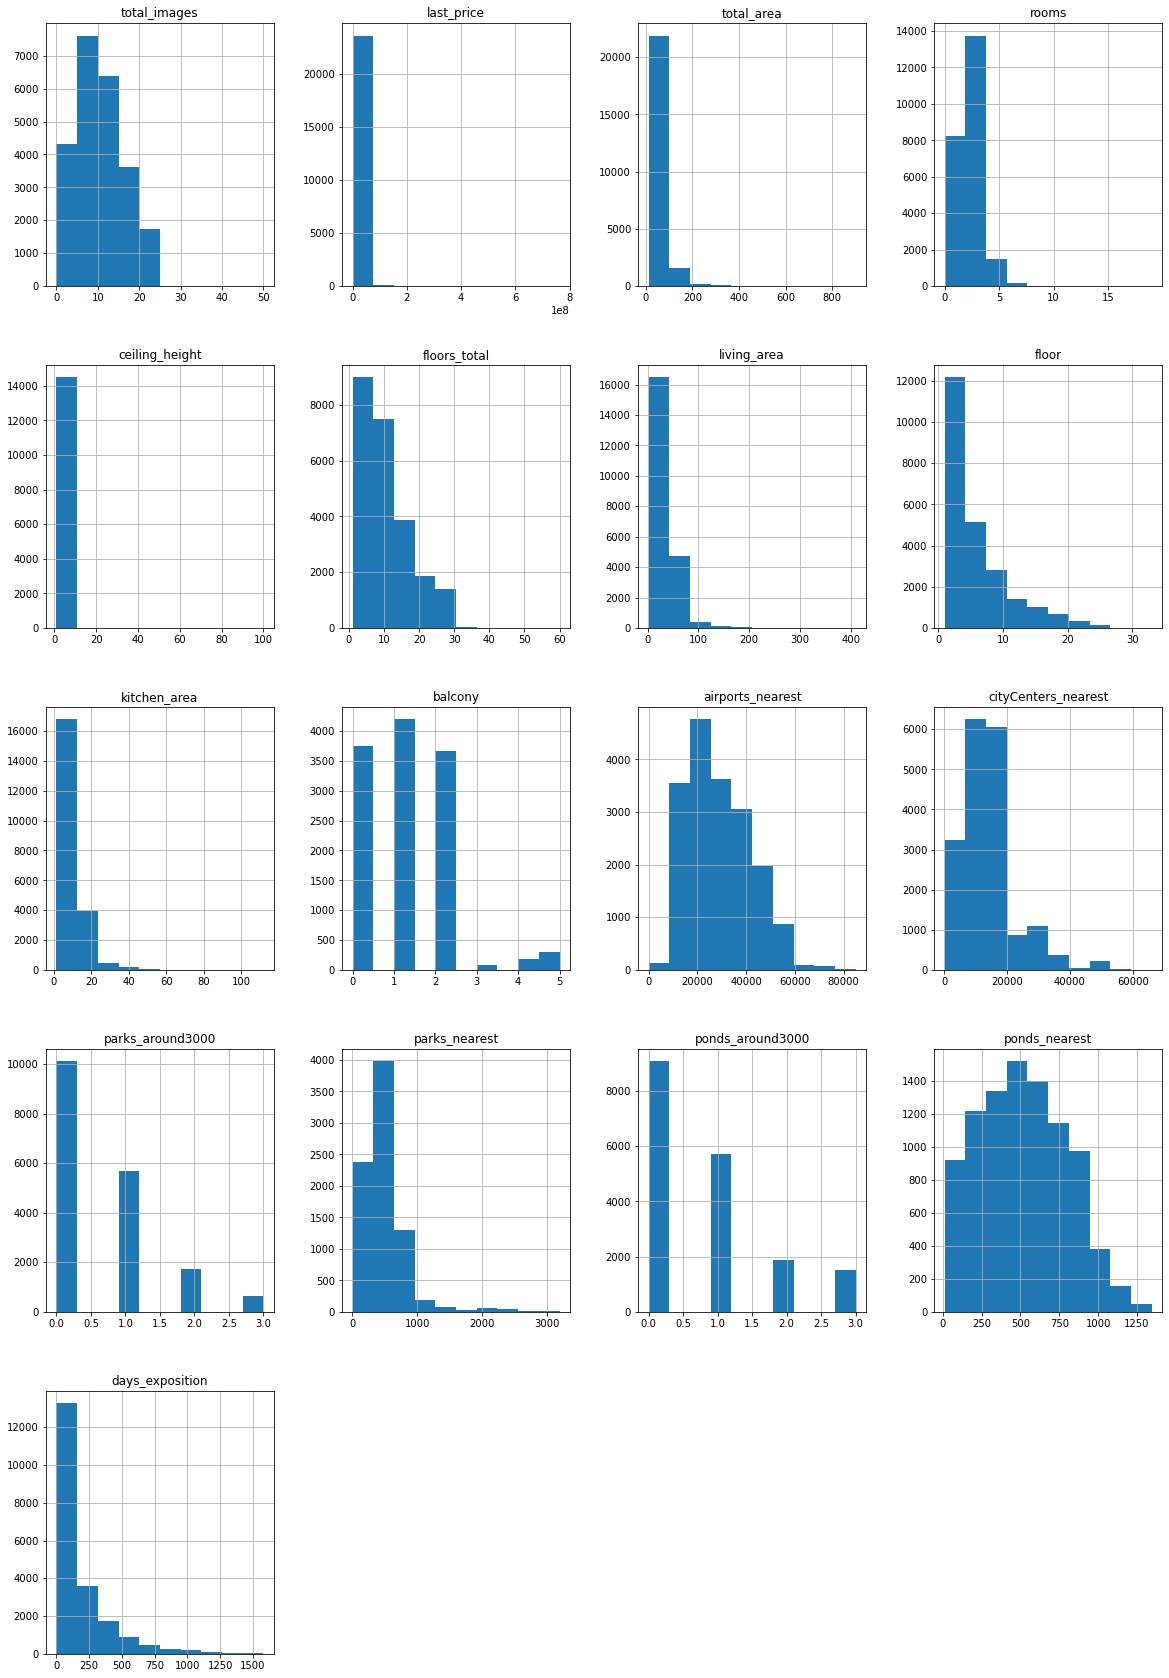

In [6]:
#Постройте общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(20, 30))
;

**Выводы:**
На входе имеем данные с  23699 записями, 22 колонки


По графикам есть вопросы по значениям столбца last_price - большинство значений сосредоточены в одном пике, вероятнее всего есть несколько значений выходящих далеко за пределы "нормальных", с этим следует разобратсья далее

Похожий вопрос по столбцам так же относящимся к площали (living_area, kitchen_area)

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
#создадим функцию которая определяет количество пропусков и процент пропусков от всех значений
def propuski(columns_name):
    try:
        nans_count = data[columns_name].isna().sum()
        nans_ratio = data[columns_name].isna().sum() / data[columns_name].isna().count()
        if  nans_count == 0:
            return print(f'стобец -  {columns_name}\nпропусков нет')
        else:
            return print(f'стобец -  {columns_name}\nколичество пропусков в столбце  - {nans_count} \nчто составляет - {nans_ratio:.2%}')
    except:
        pass


In [9]:
#создадим функцию которая проверяет сколько осталось пропусков в датафрейме
def data_nans(data):
    data_columns = data.columns
    nulls_data = pd.DataFrame(columns = ['столбец', 'процент_пропусков'])
    for column in data_columns:
        isnul_perc = (data[column].isna().sum())/(data[column].isna().count())*100
        if isnul_perc != 0:
            nulls_data = nulls_data.append({'столбец': column, 'процент_пропусков': isnul_perc},ignore_index=True)
    return nulls_data.sort_values(by = 'процент_пропусков',ignore_index=True)



In [10]:
nans = data_nans(data)
nans

,столбец,процент_пропусков
0,locality_name,0.206760
1,floors_total,0.362885
2,living_area,8.029875
3,kitchen_area,9.612220
4,days_exposition,13.422507
5,parks_around3000,23.283683
6,ponds_around3000,23.283683
7,cityCenters_nearest,23.287902
8,airports_nearest,23.384953
9,ceiling_height,38.799105


''

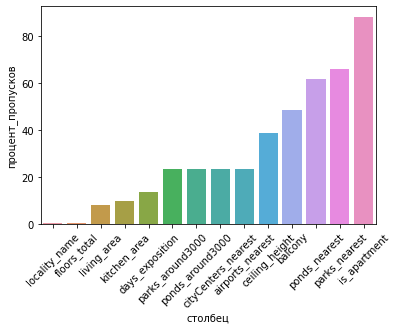

In [11]:
#построим график по % пропусков по каждому столбцу
sb.barplot(data=nans, x='столбец', y='процент_пропусков')
plt.xticks(rotation = 45)
;

**получилось что 14 столбцов имеют пропуски в данных**

ceiling_height   
living_area    
is_apartment  
kitchen_area    
balcony             
locality_name    
airports_nearest 
cityCenters_nearest   
parks_around3000      
parks_nearest      
ponds_around3000      
parks_nearest         
ponds_around3000   
ponds_nearest         
days_exposition       

#### Заполним пропуски в столбце balcony 

In [12]:
propuski('balcony')

стобец -  balcony
количество пропусков в столбце  - 11519 
что составляет - 48.61%


In [13]:
#распечатаем какие уникальные значеиня встречаются в столбце
data['balcony'].unique()


array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [14]:
#посмотрим какие значения встречаются сколько раз
print(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


Пустых значений - 11519, вероятнее всего эти данные не заполняли те, у кого нет балконов. Заменим пустые ячейки на значение "0"

In [15]:
#заполним пустые ячейки значением "0"
data['balcony'] = data['balcony'].fillna(0)

In [16]:
#проверим, устранили ли мы пропуски в значениях полностью
propuski('balcony')

стобец -  balcony
пропусков нет


Учитывая что значения являются целыми, изменим тип данных с float на int

In [17]:
data['balcony'] = data['balcony'].astype(int)

Задача выполнена

#### Удалим дубликаты и заполним пропуски в столбце locality_name         

In [18]:
#считаем пропуски в столбце locality_name
propuski('locality_name')

стобец -  locality_name
количество пропусков в столбце  - 49 
что составляет - 0.21%


In [19]:
#посмотрим какие уникальные значения в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

посчитаем их

In [20]:
# Посчитаем количество уникальных значений
data['locality_name'].nunique()

364

##### Для начала избавимся от дубликатов

Достаточно много, для начала приведем все к нижнему регистру

In [21]:
# приведем к нижнему регистру и заново посчитаем в надежде что есть дубликаты с одним названием
data['locality_name'] = data['locality_name'].str.lower() 
data['locality_name'].nunique()

364

Надежды не оправдались, количество уникальных значений не поменялось, будем смотреть дальше

Создадим функцию которая будет избавлять нас от неявных дубликатов 
например посёлок заменим на поселок
и т.п.

In [22]:
# Много одинаковых названий но с перестановкой слов, или с неполным названием
# Напишием функцию которая преобразует слова посёлок городского типа и похожие в поселок 
def locality_name_poseloc(row):
        replace_list = ['посёлок городского типа', 'поселок городского типа', \
                        'городской поселок', 'городской посёлок', 'посёлок']
        try:
            for item in replace_list:
                row = row.replace(item, 'поселок')
            return row
        except:
            pass

In [23]:
# Применим функцию к столбцу locality_name
data['locality_name'] = data['locality_name'].apply(locality_name_poseloc)
# Посмотрим какие уникальные значеиня остались
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [24]:
# Посчитаем количество
data['locality_name'].nunique()

322

Уникальных значений стало меньше. Будем считать что неявные дубликаты мы побороли.



##### Заполняем пропуски в  locality_name
Посмотрим теперь что делать с пустыми значениями, распечатаем строки где поле locality_name пустое

In [25]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0,None,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0,None,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0,None,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0,None,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0,None,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0,None,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0,None,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0,None,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4,None,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0,None,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Попытаемся восстановить какие то данные по полю 'cityCenters_nearest'  и 'airports_nearest ', c высокой долей вероятности это будет одна локация (если она равноудалена от аэропорта и от центра города)

In [26]:
#создадим датафрейм в котором соберем уникальные сочетания cityCenters_nearest и airports_nearest для значений где locality_name пустое
cityCenters_nearest_for_locality_name = data.loc[data['locality_name'].isna() &  ~data['cityCenters_nearest'].isna()& ~ data['airports_nearest'].isna(), ['cityCenters_nearest', 'airports_nearest']]
cityCenters_nearest_for_locality_name

,cityCenters_nearest,airports_nearest
1097,4258.0,23478.0
2603,17369.0,22041.0
2632,17369.0,22041.0
3574,8127.0,27419.0
4151,3902.0,25054.0
4189,3039.0,21774.0
4670,5382.0,26534.0
5343,9538.0,10556.0
5707,16788.0,21460.0
6765,17369.0,22041.0


In [27]:
# создадим два списка - с этими значениями для cityCenters_nearest и airports_nearest чтобы удобней дальше было проверять вхождения 
cityCenters_nearest_nan = cityCenters_nearest_for_locality_name['cityCenters_nearest'].tolist()
airports_nearest_nan = cityCenters_nearest_for_locality_name['airports_nearest'].tolist()

In [28]:
# Теперь создадим датафрейм в котором у нас будут сочетаения cityCenters_nearest и airports_nearest с названиями населенных пунктов относящихся к ним
cityCenters_nearest_nullslocality_name = data.loc[data['cityCenters_nearest'].isin(cityCenters_nearest_nan) & data['airports_nearest'].isin(airports_nearest_nan),['locality_name','cityCenters_nearest', 'airports_nearest'  ]]
cityCenters_nearest_nullslocality_name


,locality_name,cityCenters_nearest,airports_nearest
48,санкт-петербург,16788.0,21460.0
237,санкт-петербург,17369.0,22041.0
671,санкт-петербург,17369.0,22041.0
1097,None,4258.0,23478.0
1295,санкт-петербург,12332.0,37123.0
...,...,...,...
22334,санкт-петербург,4805.0,26090.0
22474,None,1780.0,23297.0
22656,санкт-петербург,17369.0,22041.0
22933,None,17369.0,22041.0


In [29]:
# удалим дубликаты, пустые значения и отсортируем по cityCenters_nearest
cityCenters_nearest_nullslocality_name = data.loc[data['cityCenters_nearest'].isin(cityCenters_nearest_nan) & data['airports_nearest'].isin(airports_nearest_nan),['locality_name','cityCenters_nearest', 'airports_nearest'  ]].drop_duplicates().dropna().sort_values(by= 'cityCenters_nearest')
cityCenters_nearest_nullslocality_name

,locality_name,cityCenters_nearest,airports_nearest
11094,санкт-петербург,1322.0,21219.0
11869,санкт-петербург,3801.0,24953.0
1531,санкт-петербург,3902.0,25054.0
5351,санкт-петербург,4069.0,25221.0
2483,санкт-петербург,4805.0,26090.0
18213,санкт-петербург,8582.0,14031.0
6494,санкт-петербург,8619.0,21731.0
1295,санкт-петербург,12332.0,37123.0
48,санкт-петербург,16788.0,21460.0
237,санкт-петербург,17369.0,22041.0


Полученные значения вышли только для Санкт-Петербурга
таким образом заполним пустые значения locality_name там где сочетания cityCenters_nearest и airports_nearest присутствуют в cityCenters_nearest_nullslocality_name

In [30]:
#Заменим пустые значения на Санкт петербург, там, где cityCenters_nearest и airports_nearest совпадают с полученными
cityCenters_nearest = cityCenters_nearest_nullslocality_name['cityCenters_nearest'].tolist()
airports_nearest = cityCenters_nearest_nullslocality_name['airports_nearest'].tolist()
data.loc[(data['cityCenters_nearest'].isin(cityCenters_nearest)) & (data['airports_nearest'].isin(airports_nearest)) & data['locality_name'].isna(), 'locality_name'] = 'санкт-петербург'

In [31]:
#посмотрим сколько теперь осталось пропусков
propuski('locality_name')

стобец -  locality_name
количество пропусков в столбце  - 31 
что составляет - 0.13%


In [32]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0,None,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0,None,NaN,NaN,NaN,NaN,NaN,NaN,34.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0,None,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.3,3,False,False,False,10.4,0,None,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0,None,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.1,5,False,False,False,8.3,4,None,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
7330,8,5100000.0,63.00,2015-01-27T00:00:00,3,NaN,5.0,42.0,1,False,False,False,7.5,0,None,25925.0,4627.0,2.0,459.0,0.0,NaN,566.0
8568,10,16000000.0,155.00,2016-05-09T00:00:00,3,NaN,6.0,94.0,3,NaN,False,False,23.0,0,None,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
8986,10,4850000.0,103.10,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,NaN,False,False,16.7,0,None,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
10122,5,8200000.0,83.00,2015-06-24T00:00:00,4,NaN,5.0,53.0,2,NaN,False,False,10.0,0,None,25771.0,4474.0,2.0,374.0,0.0,NaN,364.0


Осталось 31 значение none которые заполнить однозначно  не представляется возможным

In [33]:
#удалим строки с пустыми значениями в locality_name
data = data.dropna(subset = ['locality_name'])

In [34]:
propuski('locality_name')

стобец -  locality_name
пропусков нет


Задача выполнена

#### Заполним пропуски и проведем предобработку данных в столбце floors_total           

In [35]:
#посчитаем количество пустых ячеек
propuski('floors_total')

стобец -  floors_total
количество пропусков в столбце  - 85 
что составляет - 0.36%


In [36]:
# Посмотрим на уникальные значения
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [37]:
#проверим в каких локациях находятся пропущенные значения
print(data[data['floors_total'].isna()]['locality_name'].unique())

['санкт-петербург' 'кудрово' 'поселок щеглово' 'поселок бугры'
 'поселок мурино' 'поселок новоселье' 'красное село' 'поселок шушары'
 'поселок токсово' 'деревня новое девяткино' 'поселок стрельна']


Нельзя однозначно сказать что в деревнях или поселках могут быть какие то особые значения этажей, полагаться на эту зависимость было бы неправильно (судя по описаниям указанных поселков и деревень , это не похоже на обычные деревни где только одноэтажные или двухэтажные домики деревенского типа)

In [38]:
#проверим какие этажи в квартирах, в которых не указана этажность дома
print(data[data['floors_total'].isna()]['floor'].unique())             

[ 4  1 12  8  9 22 15  6  7  3 18 13 24 21 11  2  5 19 20 14 17 23 10]


In [39]:
#ради интереса, проверим на примере одного поселка, может там  дома одинаковой этажности
print(data.query('locality_name == "поселок стрельна"')['floors_total'])

637       5.0
1715      4.0
2218     10.0
2474      5.0
2670     13.0
2768      3.0
2967      9.0
2996      5.0
3004      9.0
3153      9.0
4122      6.0
5018      9.0
5106      3.0
7915      5.0
8487      8.0
8946      3.0
9078     15.0
9177      5.0
9736      5.0
10066     3.0
10620     9.0
10832     5.0
11010     9.0
13175     9.0
14172     3.0
14836     1.0
15914    10.0
15932     5.0
17537     9.0
18643     3.0
18731    10.0
18741     5.0
19138     6.0
19363     8.0
19649     3.0
19924     6.0
20146     NaN
20199     9.0
20726     7.0
21795     5.0
22213     5.0
22292     3.0
23110     2.0
23230     5.0
Name: floors_total, dtype: float64


Не найдено никакой закономерности для заполнения пустых значений, учитывая что таких значений меньше 1% от общего количества записей, удалим строки с пустыми значениями в floors_total 

In [40]:
data = data.dropna(subset=['floors_total'])
data = data.reset_index(drop=True)
propuski('floors_total')

стобец -  floors_total
пропусков нет


Учитывая что значения столбца целочисленные, изменим тип данных с float на int

In [41]:
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].head(10)

0    16
1    11
2     5
3    14
4    14
5    12
6    26
7    24
8    27
9     9
Name: floors_total, dtype: int32

Задача выполнена

#### Заполним пропуски в столбце Ceiling_height 

##### Посчитаем количество пропусков,  уникальные значения столбца

In [42]:
#посчитаем количество пустых ячеек
print(data['ceiling_height'].isna().sum())

9097


Пропущенных значений достаточно много - 38.7 % от общего количества. Будем смотреть, что с этим можно сделать. 

In [43]:
#посмотрим какие значения попадаются чаще всего и в каком количестве
print(data['ceiling_height'].value_counts().head(10))

2.50    3515
2.60    1645
2.70    1571
3.00    1111
2.80     988
2.55     980
2.75     908
2.65     674
3.20     276
3.10     203
Name: ceiling_height, dtype: int64


In [44]:
#распечатаем уникальные значения
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

Видим в данных наличие аномальных значений. Прежде чем заполнять пустые значения, обработаем "аномальные" значения. высота потолков выше 10м - выглядит подозрительно

In [45]:
#распечатаем какие значения попадаются при ceiling_height > 10
print((data.loc[data['ceiling_height'] > 10,  'ceiling_height'].unique()))

[ 25.   32.   27.   24.   26.   14.   20.   22.6  27.5  10.3 100. ]


Похоже на то, что разделитель поставлен неверно, и вероятнее всего высота потолка не 25м а 2,5
Но остается вопрос по значениям 14, 20, 22.6, 10,3

In [46]:
#Распечатаем строки где высота потолков больше 10 и меньше 24 метров
print(data.query('ceiling_height > 10 & ceiling_height < 24'))

       total_images  last_price  total_area first_day_exposition  rooms  \
14987            19   5600000.0        56.4  2018-05-11T00:00:00      2   
17414            15   6700000.0        92.9  2019-02-19T00:00:00      3   
20409            12   5950000.0        60.0  2018-02-19T00:00:00      2   
22201            20   5300000.0        45.0  2017-09-30T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
14987            14.0            14         32.4      5          NaN   False   
17414            20.0            17         53.2     14          NaN   False   
20409            22.6            14         35.0     11          NaN   False   
22201            10.3            16         15.5     15          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
14987      False           9.1        2  санкт-петербург           14814.0   
17414      False          12.0        5  санкт-петербург           

Таких хначений всего 4, проще удалить их. А в остальных исправить разделитель

In [47]:
#удаляем эти 4 строки
data = data.query('~(ceiling_height > 10 & ceiling_height < 24)')

In [48]:
#проверяем оставшиеся значения
print((data.loc[data['ceiling_height'] > 10,  'ceiling_height'].unique()))

[ 25.   32.   27.   24.   26.   27.5 100. ]


In [49]:
#исправляем разделитель
data.loc[data['ceiling_height'] > 10,  'ceiling_height'] = data['ceiling_height'] / 10

In [50]:
#посмотрим оставшиеся значения
data.sort_values(by = 'ceiling_height' )['ceiling_height']

22480    1.00
5687     1.20
16852    1.75
19007    2.00
4194     2.00
         ... 
23571     NaN
23574     NaN
23576     NaN
23579     NaN
23580     NaN
Name: ceiling_height, Length: 23579, dtype: float64

Минимальные значения  прописаны в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные».

В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м

На практике же встречаются варианты квартир где высота потолков бывает до 2,3м

возьмем эту цифру за минимальное "реальное" значение, и посмотрим что делать с остальными значениями

In [51]:
data.loc[data['ceiling_height'] < 2.3]['ceiling_height'].unique()

array([2.  , 1.2 , 2.2 , 1.75, 2.25, 1.  ])

посчитаем их количество

In [52]:
# посчитаем их количество
data.loc[data['ceiling_height'] < 2.3]['ceiling_height'].count()

16

учитывая малое количество таких значений, удалим их

In [53]:
# учитывая малое количество таких значений, удалим их
data = data.loc[~(data['ceiling_height'] < 2.3)]

In [54]:
#проверим размерность датафрейма после удаления 
data.shape

(23563, 22)


Было бы на мой взгляд логичным заполнить пропуски в зависимости от этажности дома (столбец floors_total). Заполним значение медианной величиной по каждому значению floors_total

In [55]:
for floor in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floor) & (data['ceiling_height'].isna()),'ceiling_height' ] = \
    data.loc[data['floors_total'] == floor, 'ceiling_height' ].median()
    
print(data['ceiling_height'].isna().sum())

1


Вышло предупреждение после выполнения команд, вероятнее всего для какого то типа домов с определенным floors_total, все значения ceiling_height nan

проверим

In [56]:
#выведем столбцы  floors_total, где значение ceiling_height Nan
data.loc[data['ceiling_height'].isna()]['floors_total']

11516    33
Name: floors_total, dtype: int32

33 этаж остался незаполненным

Проверим есть ли значения ceiling_height для 33 этажей в других строках

In [57]:
#значения ceiling_height для 33 этажных домов
data.loc[data['floors_total'] == 33]['ceiling_height']

11516   NaN
Name: ceiling_height, dtype: float64

Получается что пустое значение осталось одно, удалим его

In [58]:
data = data.dropna(subset=['ceiling_height'])
data = data.reset_index(drop=True)
propuski('ceiling_height')

стобец -  ceiling_height
пропусков нет


In [59]:
#проверим размерность нашего датасета
data.shape

(23562, 22)

Задача выполнена

#### Заполним пропуски в столбце 	 is_apartment	

In [60]:
propuski('is_apartment')

стобец -  is_apartment
количество пропусков в столбце  - 20803 
что составляет - 88.29%


In [61]:
data.loc[~data['is_apartment'].isna()]['is_apartment'].value_counts()

False    2709
True       50
Name: is_apartment, dtype: int64

Вероятнее всего значения которые не заполены, это те где не аппартаменты

In [62]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [63]:
propuski('is_apartment')


стобец -  is_apartment
пропусков нет


Задача выполнена

#### Заполним пропуски в столбце living_area	 

In [64]:
propuski('living_area')

стобец -  living_area
количество пропусков в столбце  - 1863 
что составляет - 7.91%


проверим, не равно ли жилай площадь разнице между общей и кухней

In [65]:
#сравним разницу между total_area и kitchen_area с living_area
data['delta_area'] = data['total_area'] - data['kitchen_area']
data.loc[:, ['living_area','delta_area']]

,living_area,delta_area
0,51.0,83.00
1,18.6,29.40
2,34.3,47.70
3,NaN,NaN
4,32.0,59.00
...,...,...
23557,73.3,119.98
23558,38.0,50.50
23559,29.7,NaN
23560,NaN,53.45


Значения не совпадают, посмотрим что вообще есть жилая площадь по описанию:

"Жилая площадь — это сумма площадей жилых комнат в квартире. К ним относятся спальня, гостиная, детская, кабинет"
таким образом, можем посчитать жилую площадь как медиану по площадам для каждого значения количества комнат

Заполним значение living_area медианным значением в зависимости от количества комнат исходя из определения жилой площади

In [66]:
# Заполним значение living_area медианным значением в зависимости от количества комнат исходя из определения жилой площади
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()),'living_area' ] = \
    data.loc[data['rooms'] == room, 'living_area' ].median()
    


In [67]:
#Удалим ненужный столбец delta_area
data = data.drop('delta_area', axis = 1)

In [68]:
propuski('living_area')

стобец -  living_area
пропусков нет


#### Заполним пропуски в столбце kitchen_area		 

In [69]:
propuski('kitchen_area')

стобец -  kitchen_area
количество пропусков в столбце  - 2221 
что составляет - 9.43%


проверим, может пропуски там, где недвижимость считается аппартаментами

In [70]:
data.loc[data['is_apartment'] == True, ['kitchen_area']].head(15)

,kitchen_area
540,NaN
911,NaN
1103,20.00
1602,NaN
2748,NaN
2962,10.29
3053,25.00
3800,15.90
3933,12.00
4318,NaN


Гипотеза не подтвердилась. Тогда заполним по аналогии с living_area

In [71]:
# Заполним пропуски в kitchen_area медианным значением в зависимости от количества комнат
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()),'kitchen_area' ] = \
    data.loc[data['rooms'] == room, 'kitchen_area' ].median()
    
        

Вышло предупреждение, вероятнее всего часть значений не заполнилось, проверим 

In [72]:
propuski('kitchen_area')

стобец -  kitchen_area
количество пропусков в столбце  - 194 
что составляет - 0.82%


In [73]:
# посмотрим по сводной таблице по какому количеству комнат не считается медиана
data.pivot_table(index = 'rooms', values = 'kitchen_area', aggfunc = 'median')

,kitchen_area
rooms,
1,9.00
2,8.70
3,9.50
4,11.00
5,15.10
6,19.75
7,20.00
8,25.00
9,14.30


In [74]:
#выведем уникальные значения и сравним с теми что есть в сводной таблице
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

видим для для 0 комнат не посчиталась медиана

In [75]:
# проверим какие значения kitchen_area для rooms = 0

data.loc[data['rooms'] == 0]['kitchen_area']

144     NaN
347     NaN
438     NaN
505     NaN
604     NaN
         ..
23076   NaN
23307   NaN
23419   NaN
23456   NaN
23501   NaN
Name: kitchen_area, Length: 194, dtype: float64

In [76]:
data.loc[data['rooms'] == 0, ['living_area', 'kitchen_area', 'total_area']].sort_values(by = 'total_area')

,living_area,kitchen_area,total_area
8845,10.0,NaN,15.5
9369,13.0,NaN,16.0
711,12.0,NaN,17.0
12924,16.0,NaN,18.0
8714,15.8,NaN,18.8
...,...,...,...
13540,33.0,NaN,58.4
21107,68.0,NaN,71.0
3443,50.0,NaN,73.6
19971,60.5,NaN,98.4


не заполнились значения kitchen_area для тех значений комнат, где невозможно было посчитать среднее изза отсутствующих значений. видим что таких значения находятся в квартирах с 0 комнатами, таким образом эти значения можно заменить на 0

In [77]:
#заменим Nan на 0 
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [78]:
propuski('kitchen_area')

стобец -  kitchen_area
пропусков нет


Задача выполнена

#### Заполним пропуски в столбце parks_around3000, ponds_around3000

In [79]:
propuski('parks_around3000')

стобец -  parks_around3000
количество пропусков в столбце  - 5489 
что составляет - 23.30%


In [80]:
propuski('ponds_around3000')

стобец -  ponds_around3000
количество пропусков в столбце  - 5489 
что составляет - 23.30%


In [81]:
# посмотрим уникальные значения там где они не Nan
data.loc[~data['parks_around3000'].isna()]['parks_around3000'].value_counts()

0.0    10049
1.0     5647
2.0     1734
3.0      643
Name: parks_around3000, dtype: int64

In [82]:
# посмотрим уникальные значения там где они не Nan
data.loc[~data['ponds_around3000'].isna()]['ponds_around3000'].value_counts()

0.0    9028
1.0    5670
2.0    1883
3.0    1492
Name: ponds_around3000, dtype: int64

Указано в единицах Измерений (указывает на то, сколько парков/прудов вокруг 3км)

parks_nearest,ponds_nearest - если будет указано расстояние меньше 3000, то  можно будет поставить 1 в значения parks_around3000/ponds_around3000 соответственно

In [83]:
data.loc[data['parks_around3000'].isna()]['parks_nearest'].value_counts()

Series([], Name: parks_nearest, dtype: int64)

In [84]:
data.loc[data['ponds_around3000'].isna()]['ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

Но как показывают распечатки, такие значеиня не указаны. поэтому оставляем значения пустыми
Скорее всего парков не было  рядом, а может быть человек просто не заполнил поле


Задача выполнена

#### Заполним пропуски в столбце cityCenters_nearest, airports_nearest, ponds_nearest,parks_nearest	

In [85]:
propuski('cityCenters_nearest')

стобец -  cityCenters_nearest
количество пропусков в столбце  - 5490 
что составляет - 23.30%


In [86]:
propuski('airports_nearest')

стобец -  airports_nearest
количество пропусков в столбце  - 5513 
что составляет - 23.40%


In [87]:
propuski('ponds_nearest')

стобец -  ponds_nearest
количество пропусков в столбце  - 14517 
что составляет - 61.61%


In [88]:
propuski('parks_nearest')

стобец -  parks_nearest
количество пропусков в столбце  - 15534 
что составляет - 65.93%


Теперь посмотрим какие измерения занесены в столбцы cityCenters_nearest/airports_nearest/ponds_nearest/parks_nearest

In [89]:
data.loc[~data['cityCenters_nearest'].isna()]['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
8370.0     26
           ..
24311.0     1
1507.0      1
1806.0      1
15782.0     1
6263.0      1
Name: cityCenters_nearest, Length: 7623, dtype: int64

In [90]:
data.loc[~data['airports_nearest'].isna()]['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
52394.0     1
20007.0     1
22003.0     1
13081.0     1
24665.0     1
Name: airports_nearest, Length: 8252, dtype: int64

In [91]:
data.loc[~data['ponds_nearest'].isna()]['ponds_nearest'].value_counts()

427.0     69
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1164.0     1
967.0      1
1076.0     1
137.0      1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

In [92]:
data.loc[~data['parks_nearest'].isna()]['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     31
          ..
873.0      1
859.0      1
1150.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 994, dtype: int64

Есть мысли, что пропуски можно заполнить по столбцу airports_nearest для деревень, проверим, сильно ли различаются значения для конкретных деревень

In [93]:
# сделаем сводную таблицу с минимальным/максимальным/медианным расстоянем до аэропорта , 
# и значением разницы между минимальным и максимальным значением
data_airports_nearest_pivot = data.pivot_table(index = 'locality_name', values = ['airports_nearest'], aggfunc = ['min', 'max', 'median'])
data_airports_nearest_pivot = data_airports_nearest_pivot.reset_index()
data_airports_nearest_pivot.columns = ['locality_name', 'min', 'max', 'median']

In [94]:
data_airports_nearest_pivot['delta'] = (data_airports_nearest_pivot['max'] - data_airports_nearest_pivot['min'])

In [95]:
# выведем полученную таблицу отсортированную по разнице между минимальеным и максимальным расстоянием до аэропорта
data_airports_nearest_pivot.sort_values(by = 'delta')

,locality_name,min,max,median,delta
8,поселок белоостров,57769.0,57769.0,57769.0,0.0
15,поселок петро-славянка,20605.0,20605.0,20605.0,0.0
9,поселок левашово,52693.0,52693.0,52693.0,0.0
20,поселок усть-ижора,26500.0,26521.0,26510.5,21.0
18,поселок сапёрный,34110.0,34180.0,34147.5,70.0
7,поселок александровская,12781.0,13012.0,12896.5,231.0
12,поселок молодёжное,83758.0,84869.0,84665.0,1111.0
10,поселок лисий нос,54068.0,55930.0,55909.0,1862.0
11,поселок металлострой,24629.0,26729.0,25758.0,2100.0
19,поселок стрельна,26770.0,28945.0,28317.0,2175.0


Для поселков где разница меньше километра, моэно заполить значение airports_nearest медианным значением

In [96]:
# датафрейм со значениеми дельты меньше 1 км
data_airports_nearest_pivot = data_airports_nearest_pivot.loc[data_airports_nearest_pivot['delta'] < 1000]
data_airports_nearest_pivot

,locality_name,min,max,median,delta
7,поселок александровская,12781.0,13012.0,12896.5,231.0
8,поселок белоостров,57769.0,57769.0,57769.0,0.0
9,поселок левашово,52693.0,52693.0,52693.0,0.0
15,поселок петро-славянка,20605.0,20605.0,20605.0,0.0
18,поселок сапёрный,34110.0,34180.0,34147.5,70.0
20,поселок усть-ижора,26500.0,26521.0,26510.5,21.0


In [97]:
#выделим поселки в отдельный лист для удобства заполнения пропусков 
# и создадим словарь с соответсивем 
locality_name_to_air_data = data_airports_nearest_pivot['locality_name'].to_list()
locality_median_to_air_data = data_airports_nearest_pivot['median'].to_list()


air_dictionary = dict(zip(locality_name_to_air_data, locality_median_to_air_data))
print(air_dictionary)

{'поселок александровская': 12896.5, 'поселок белоостров': 57769.0, 'поселок левашово': 52693.0, 'поселок петро-славянка': 20605.0, 'поселок сапёрный': 34147.5, 'поселок усть-ижора': 26510.5}


In [98]:
for locality_name in locality_name_to_air_data:
    data.loc[(data['locality_name'] == locality_name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    air_dictionary.get(locality_name)
        

In [99]:
propuski('airports_nearest')

стобец -  airports_nearest
количество пропусков в столбце  - 5513 
что составляет - 23.40%


Оставшиеся значения оставим пустыми

#### Обработаем пропуски в столбце days_exposition       

Посмотрим в какие даты были опубликованы объявления, в которых пропущены значения days_exposition

In [100]:
data.loc[data['days_exposition'].isna(), ['days_exposition', 'first_day_exposition' ]].sort_values(by = 'first_day_exposition', ascending = 'false')

,days_exposition,first_day_exposition
3277,NaN,2014-11-27T00:00:00
15773,NaN,2014-11-27T00:00:00
3855,NaN,2014-11-27T00:00:00
6887,NaN,2014-12-08T00:00:00
15531,NaN,2014-12-09T00:00:00
...,...,...
12276,NaN,2019-05-03T00:00:00
12141,NaN,2019-05-03T00:00:00
14989,NaN,2019-05-03T00:00:00
5954,NaN,2019-05-03T00:00:00


Есть как и новые, так и достаточно старые объявления.посмотрим , может их что то еще объединяет

In [101]:
data.loc[data['days_exposition'].isna(), ['days_exposition', 'first_day_exposition' , 'last_price', 'locality_name' ]].sort_values(by = 'last_price', ascending = False)

,days_exposition,first_day_exposition,last_price,locality_name
22698,NaN,2019-03-19T00:00:00,289238400.0,санкт-петербург
1021,NaN,2018-10-12T00:00:00,155000000.0,санкт-петербург
3103,NaN,2019-03-30T00:00:00,140000000.0,санкт-петербург
12788,NaN,2019-04-09T00:00:00,140000000.0,санкт-петербург
17812,NaN,2019-02-07T00:00:00,135000000.0,санкт-петербург
...,...,...,...,...
1663,NaN,2019-04-27T00:00:00,650000.0,сланцы
22933,NaN,2019-04-24T00:00:00,600000.0,деревня коркино
15884,NaN,2018-06-20T00:00:00,590000.0,сланцы
2088,NaN,2019-04-30T00:00:00,500000.0,деревня чудской бор


посмотрим есть ли зависимость от цены

<AxesSubplot:>

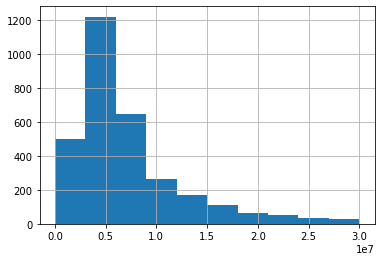

In [102]:
data.loc[data['days_exposition'].isna()]['last_price'].hist(range = (0, 30000000))

<AxesSubplot:>

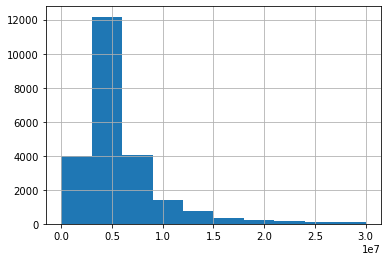

In [103]:
data['last_price'].hist(range = (0, 30000000))

In [104]:
#Посмотрим какие значения по итогу остались пустыми в датафрейме
data_nans(data)

,столбец,процент_пропусков
0,days_exposition,13.441134
1,parks_around3000,23.295985
2,ponds_around3000,23.295985
3,cityCenters_nearest,23.300229
4,airports_nearest,23.397844
5,ponds_nearest,61.611917
6,parks_nearest,65.928189


Остались те значения которые мы решили не заполнять
days_exposition - пустые значения это объявления не снятые (не проданные квартиры)
Остальные столбцы - это незаполненные (предположительно :)

#### Преобразуем тип данных  в столбце first_day_exposition   

Преобразуем данные в формат времени

In [105]:
# посмотрим как выглядат данные сейчас
data['first_day_exposition'].head(15)

0     2019-03-07T00:00:00
1     2018-12-04T00:00:00
2     2015-08-20T00:00:00
3     2015-07-24T00:00:00
4     2018-06-19T00:00:00
5     2018-09-10T00:00:00
6     2017-11-02T00:00:00
7     2019-04-18T00:00:00
8     2018-05-23T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
11    2018-08-27T00:00:00
12    2016-06-30T00:00:00
13    2017-07-01T00:00:00
14    2016-06-23T00:00:00
Name: first_day_exposition, dtype: object

In [106]:
#  Преобразуем формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format = '%Y-%m-%dT%H:%M' )

In [107]:
# посмотрим что из этого вышло
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

задача выполнена

#### Проверим типы данных в столбцах


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23562 non-null  int64         
 1   last_price            23562 non-null  float64       
 2   total_area            23562 non-null  float64       
 3   first_day_exposition  23562 non-null  datetime64[ns]
 4   rooms                 23562 non-null  int64         
 5   ceiling_height        23562 non-null  float64       
 6   floors_total          23562 non-null  int32         
 7   living_area           23562 non-null  float64       
 8   floor                 23562 non-null  int64         
 9   is_apartment          23562 non-null  bool          
 10  studio                23562 non-null  bool          
 11  open_plan             23562 non-null  bool          
 12  kitchen_area          23562 non-null  float64       
 13  balcony         

Числовые значения которые выражаются целыми цислами,  уже преобразовали ранее в формате int. 

#### Проверим аномальные значения в столбцах

##### Last_price

<AxesSubplot:>

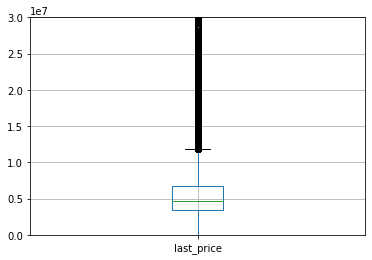

In [109]:
plt.ylim(0, 30000000)
data.boxplot(column=['last_price'])

как видим, есть значения которые выбиваются своим большим значением среди остальных

In [110]:
#посчитаем сколько значений больше 30 млн
data.loc[data['last_price'] > 30000000]['last_price'].value_counts()

35000000.0    13
40000000.0    12
33000000.0     9
37000000.0     8
65000000.0     7
              ..
35953504.0     1
59534892.0     1
37900000.0     1
43185328.0     1
64990000.0     1
Name: last_price, Length: 201, dtype: int64

In [111]:
data.loc[data['last_price'] > 30000000]['last_price'].count()

315

In [112]:
#посмотрим какие значения самые большие по стоимости (первые 20 шт)
data['last_price'].sort_values(ascending = False).head(20)

12899    763000000.0
19430    420000000.0
14625    401300000.0
1430     330000000.0
15568    300000000.0
22698    289238400.0
16374    245000000.0
13674    240000000.0
5862     230000000.0
8859     190870000.0
19755    180000000.0
19048    160000000.0
2526     159984000.0
16408    159000000.0
1021     155000000.0
14934    150000000.0
7819     150000000.0
22103    148000000.0
3103     140000000.0
12605    140000000.0
Name: last_price, dtype: float64

отфильтруем значения больще 300 млн (для сохранности "старого" датафрейма сохраним его в old_data)

In [113]:
old_data = data

In [114]:
#исключим те строки, где стоимость квартиры выше  30млн
data = data.query('last_price < 30000000')

In [115]:
data.shape[0] / old_data.shape[0]

0.9862066038536627

Таким образом удалили  1,2 процента записей

##### rooms

<AxesSubplot:>

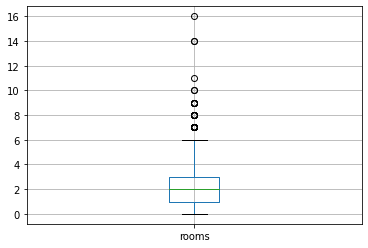

In [116]:
data.boxplot(column=['rooms'])

Есть единичные значения с выбивающимся большим количеством комнат

In [117]:
#посчитаем сколько значений больше 10
data.loc[data['rooms'] > 7]['rooms'].value_counts()

8     7
9     6
14    2
10    2
11    1
16    1
Name: rooms, dtype: int64

In [118]:
data.loc[data['rooms'] > 7]['rooms'].count()

19

Исключим те строки, где количество комнат  больше 7

In [119]:
data = data.query('rooms <= 7')

In [120]:
data.shape[0] / old_data.shape[0]

0.9854002206943383

##### Total_area

<AxesSubplot:>

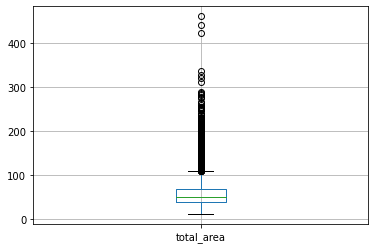

In [121]:
data.boxplot(column=['total_area'])

Есть единичные значения с выбивающимся большими значениями площадей

In [122]:
#посчитаем сколько значений больше 200
data.loc[data['total_area'] > 200]['total_area'].value_counts()

230.00    5
211.00    5
204.00    4
214.00    3
201.00    3
206.00    2
250.00    2
220.00    2
240.00    2
215.00    2
225.00    1
217.00    1
251.00    1
226.00    1
203.00    1
259.60    1
239.00    1
327.20    1
250.20    1
230.10    1
336.00    1
238.26    1
320.00    1
460.80    1
210.00    1
213.00    1
277.60    1
256.00    1
422.20    1
287.50    1
275.00    1
284.00    1
312.00    1
205.00    1
253.00    1
211.40    1
201.90    1
201.50    1
255.00    1
266.20    1
210.40    1
441.98    1
281.10    1
290.00    1
228.00    1
253.70    1
202.00    1
236.00    1
231.00    1
248.00    1
222.00    1
237.00    1
263.80    1
249.00    1
215.20    1
231.20    1
Name: total_area, dtype: int64

In [123]:
data.loc[data['total_area'] > 200]['total_area'].count()

76

In [124]:
data = data.query('total_area <= 200')

In [125]:
data.shape[0] / old_data.shape[0]

0.982174688057041

*Вывод*: Таким образом удалили "аномальные" значения для площадей выше 200кв м, стоимости больше 30 млн и количества комнат более 7. удалив тем самым не более 10 процентов данных (а точнее 1,2 %)

### Посчитаем и добавим в таблицу новые столбцы

#### Цена одного квадратного метра;

In [126]:
#Посчитаем цену одного квадратного метра - создадим новый столбец 'price_square_m'
data['price_square_m'] = data['last_price'] / data['total_area']
data['price_square_m'].head(10)

0     120370.370370
1      82920.792079
2      92785.714286
4     100000.000000
5      95065.789474
6      99195.710456
7     110544.692737
8      87454.764777
9      88524.590164
10    127525.252525
Name: price_square_m, dtype: float64

задача выполнена

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [127]:
# создадим новый столбец с днями неделей
data['weekday'] =  data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
4        1
5        0
        ..
23557    1
23558    0
23559    6
23560    1
23561    4
Name: weekday, Length: 23142, dtype: int64

Задача выполнена

#### Месяц публикации объявления

In [128]:
# создадим новый столбец с месяцами
data['month'] =  data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
4         6
5         9
         ..
23557     3
23558     1
23559     2
23560     3
23561     7
Name: month, Length: 23142, dtype: int64

In [129]:
# создадим функцию для названия месяцев
def month_name(row):
    try:
        
        if row == 1:
            return 'январь'
        elif row == 2:
            return 'февраль'
        elif row == 3:
            return 'март'    
        elif row == 4:
            return 'апрель'
        elif row == 5:
            return 'май'
        elif row == 6:
            return 'июнь'
        elif row == 7:
            return 'июль'
        elif row == 8:
            return 'август'
        elif row == 9:
            return 'сентябрь'
        elif row == 10:
            return 'октябрь'
        elif row == 11:
            return 'ноябрь'   
        elif row == 12:
            return 'декабрь'    
        
    except:
        return None
    
        

In [130]:
#добавим колонку с названиями месяцев
data['month_name'] = data['month'].apply(month_name)

In [131]:
# посмотрим что получилось
data['month_name'].head(10)

0         март
1      декабрь
2       август
4         июнь
5     сентябрь
6       ноябрь
7       апрель
8          май
9      февраль
10      ноябрь
Name: month_name, dtype: object

#### Год публикации объявления

In [132]:
# создадим колонку с годом
data['year'] = data['first_day_exposition'].dt.year
data['year'].head(10)

0     2019
1     2018
2     2015
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
Name: year, dtype: int64

#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [133]:
# создадим столбец с нулевыми значениями, в дальнейшем заполним его по условиям
data['type_floor'] = 0

In [134]:
# заполним первые этажи по условию
data.loc[data['floor'] == 1,'type_floor' ] = 'первый'

In [135]:
# заполним последние этажи по условию
data.loc[data['floor'] == data['floors_total' ],'type_floor' ] = 'последний'

In [136]:
# заполним оставшиеся значения  
data.loc[data['type_floor'] == 0, 'type_floor'] = 'другой'

In [137]:
# посмотрим сколько каких значений
data['type_floor'].value_counts()

другой       17025
последний     3258
первый        2859
Name: type_floor, dtype: int64

#### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [138]:
# заменим значения на целое от деления на 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000


In [139]:
data['cityCenters_nearest_km'].head(10)

0     16.0
1     18.0
2     13.0
4      8.0
5      NaN
6     19.0
7     11.0
8      NaN
9     15.0
10    13.0
Name: cityCenters_nearest_km, dtype: float64

### Проведем исследовательский анализ данных

#### Изучим следующие параметры объектов
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

In [140]:
#напишем функцию которая расчитывает квартили и значеиня "усов" за пределами которых уже  находятся выбросы  
# на вход подаем название столбца
def quantile(column):
    #расчитываем квартили, межквартильный размах и значения минимума и максимума "усов"
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1 
    norm_max = q3 + 1.5*iqr if q3 + 1.5*iqr < data[column].max() else data[column].max()
    norm_min = q1 - 1.5*iqr if q1 - 1.5*iqr > data[column].min() else data[column].min()
    median = data[column].median()
    quantile_key = ['columns','norm_min', 'q1', 'median', 'q3', 'norm_max']
    quantile_list = [column, norm_min, q1, median, q3, norm_max]
    #заключаем в словарь, для того чтобы в дальнейшем можно было преобразовать в датафрейм
    quantile_dictionary = dict(zip(quantile_key, quantile_list))
    return quantile_dictionary
        


##### Изучим параметры объектов площади (общая, жилая, кухня)

In [141]:
import matplotlib.pyplot as plt

<AxesSubplot:>

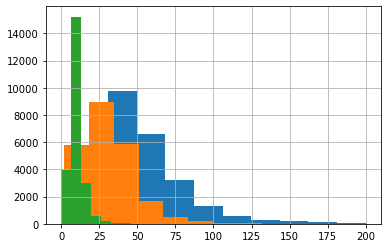

In [142]:
#Общая площадь
data['total_area'].hist()
data['living_area'].hist()
data['kitchen_area'].hist()


По такому графику ничего непонятно, поиграемся с количеством корзин и параметром range

###### total_area

<AxesSubplot:>

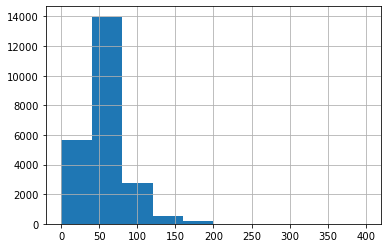

In [143]:
data['total_area'].hist( range = (0, 400))

<AxesSubplot:>

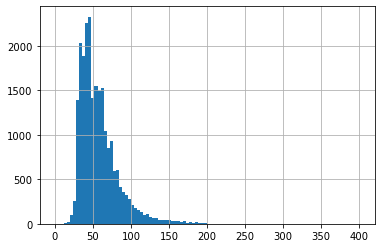

In [144]:
data['total_area'].hist(bins = 100, range = (0, 400))

Text(0.5, 0, 'total_area')

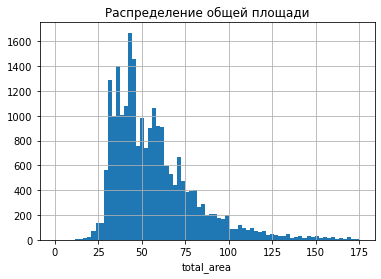

In [145]:
data['total_area'].hist(bins = 75, range = (0, 175))
plt.title("Распределение общей площади")
plt.xlabel("total_area")

Пики наблюдаются в значениях которые соответствуют типовым планировкам квартир ("однушки", "двушки","трешки" в панельках и хрущевках)

<AxesSubplot:>

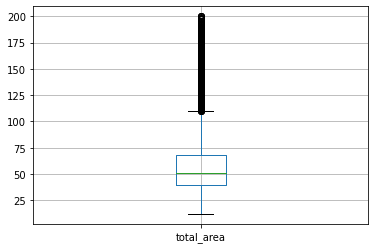

In [146]:
#посмотрим на диаграмму размаха для значений total_area
data.boxplot(column=['total_area'])

<AxesSubplot:>

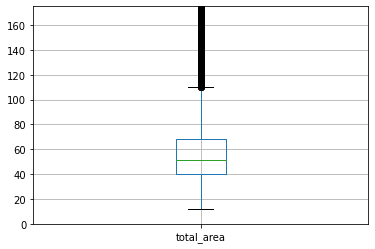

In [147]:
#для наглядности сделаем ограничение по оси y
plt.ylim(0, 175)
data.boxplot(column=['total_area'])

In [148]:
pd.DataFrame([quantile('total_area')])

,columns,norm_min,q1,median,q3,norm_max
0,total_area,12.0,40.0,51.3,68.0,110.0


**Вывод:** Медианное значение total_area - 51,3 квм, нижний и верхний квартили - 40 и 68 соответственно 
значения площадей выше примерно 110 кв м уже можно считать "редкими"

###### living_area

Text(0.5, 0, 'living_area')

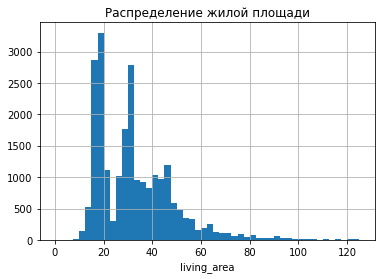

In [149]:
#построим гистограмму 
data['living_area'].hist(bins = 50, range = (0, 125))
plt.title("Распределение жилой площади")
plt.xlabel("living_area")

аналогично с total_area - в living_area есть такие значения , которые наиболее частые (связано с типовыми планировками квартир, где площади одинаковые)

<AxesSubplot:>

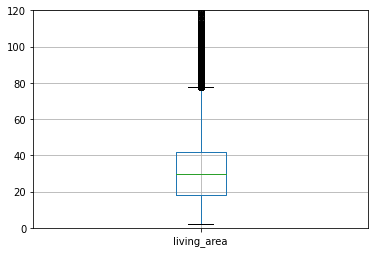

In [150]:
#построим диаграмму размаха
plt.ylim(0, 120)
data.boxplot(column=['living_area'])

In [151]:
data['living_area'].describe()

count    23142.000000
mean        32.792282
std         16.670467
min          2.000000
25%         18.285000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [152]:
pd.DataFrame([quantile('living_area')])

,columns,norm_min,q1,median,q3,norm_max
0,living_area,2.0,18.285,30.0,42.0,77.5725


**Вывод:** Медианное значение living_area -  30 квм, нижний и верхний квартили - 18 и 42 соответственно 
значения площадей выше примерно 77,57 м уже можно считать "редкими"

###### kitchen_area

Text(0.5, 0, 'kitchen_area')

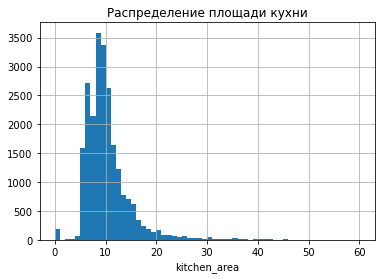

In [153]:
# построим диаграмму
data['kitchen_area'].hist(bins = 60, range = (0, 60))
plt.title("Распределение площади кухни")
plt.xlabel("kitchen_area")

<AxesSubplot:>

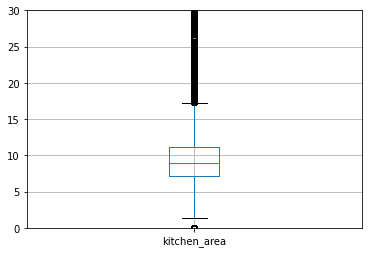

In [154]:
plt.ylim(0, 30)
data.boxplot(column=['kitchen_area'])

In [155]:
pd.DataFrame([quantile('kitchen_area')])

,columns,norm_min,q1,median,q3,norm_max
0,kitchen_area,0.95,7.1,9.0,11.2,17.35


**Вывод:** Медианное значение kitchen_area -  9.0 квм, нижний и верхний квартили - 7 и 11 соответственно. Значения площадей выше примерно 17,35 м уже можно считать "редкими"

##### last_price

<AxesSubplot:>

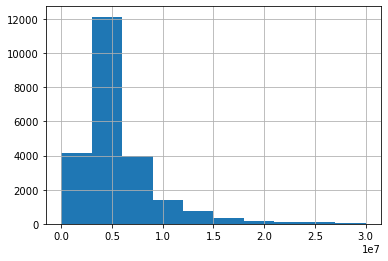

In [156]:
#построим гистограмму
data['last_price'].hist()

In [157]:
data['last_price'] = data['last_price'] / 1000

подберем оптимальные значения корзин и порогов

Text(0.5, 0, 'last_price')

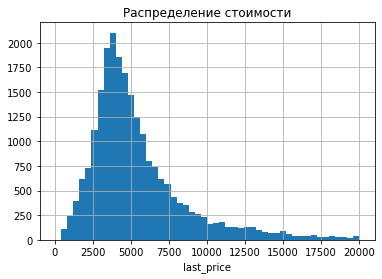

In [158]:
data['last_price'].hist( bins = 50, range = (0, 20000))
plt.title("Распределение стоимости")
plt.xlabel("last_price")

<AxesSubplot:>

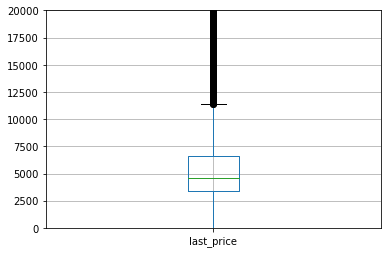

In [160]:
plt.ylim(0, 20000)
data.boxplot(column=['last_price'])

In [161]:
pd.DataFrame([quantile('last_price')])

,columns,norm_min,q1,median,q3,norm_max
0,last_price,12.19,3400.0,4600.0,6600.0,11400.0


Медианное значение last_price -  4,650 млн, q1 и q3  -3,4 и 6,6 соответственно 
значения стоимости выше примерно 11.4 млн уже можно считать "редкими"

##### Количество комнат

Text(0.5, 0, 'rooms')

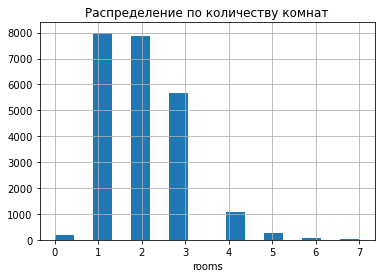

In [162]:
#построим гистограмму
data['rooms'].hist(bins = 16)
plt.title("Распределение по количеству комнат")
plt.xlabel("rooms")

In [163]:
pd.DataFrame([quantile('rooms')])

,columns,norm_min,q1,median,q3,norm_max
0,rooms,0,1.0,2.0,3.0,6.0


**Вывод:** "однушки", "двушки" и "трешки" наиболее встречаемые, остальных очень мало

##### Высота потолков

Text(0.5, 0, 'ceiling_height')

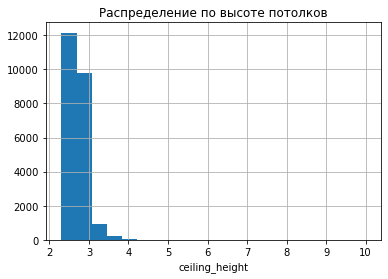

In [164]:
#построим гистограмму
data['ceiling_height'].hist(bins = 20)
plt.title("Распределение по высоте потолков")
plt.xlabel("ceiling_height")

In [165]:
data['ceiling_height'].describe()

count    23142.000000
mean         2.701623
std          0.235945
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

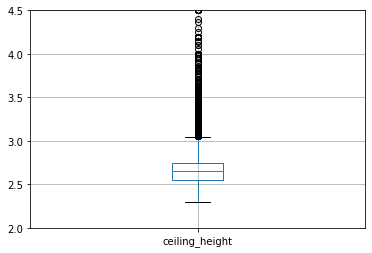

In [166]:
plt.ylim(2.0, 4.5)
data.boxplot(column=['ceiling_height'])

In [167]:
pd.DataFrame([quantile('ceiling_height')])

,columns,norm_min,q1,median,q3,norm_max
0,ceiling_height,2.3,2.55,2.65,2.75,3.05


**Вывод:** Медианное значение ceiling_height -  2,65 м, нижний и верхний квартили -2,55 и 2,75 соответственно 
значения  выше примерно 3,05 м уже можно считать "редкими"

##### Этаж квартиры;

Text(0.5, 0, 'floor')

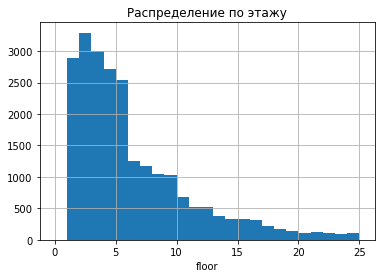

In [168]:
data['floor'].hist(bins = 25, range = (0, 25))
plt.title("Распределение по этажу")
plt.xlabel("floor")

In [169]:
data['floor'].describe()

count    23142.000000
mean         5.894045
std          4.893173
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

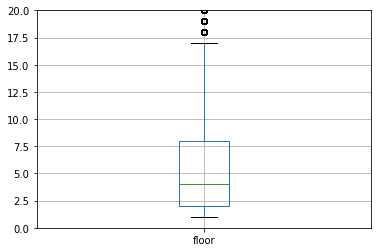

In [170]:
plt.ylim(0, 20)
data.boxplot(column=['floor'])

In [171]:
pd.DataFrame([quantile('floor')])

,columns,norm_min,q1,median,q3,norm_max
0,floor,1,2.0,4.0,8.0,17.0


**Вывод:** Медианное значение floor -  4, нижний и верхний квартили -    2 и 8 соответственно 
значения этажа выше примерно 17 уже можно считать "редкими"

##### Тип этажа квартиры («первый», «последний», «другой»);

Text(0.5, 0, 'type_floor')

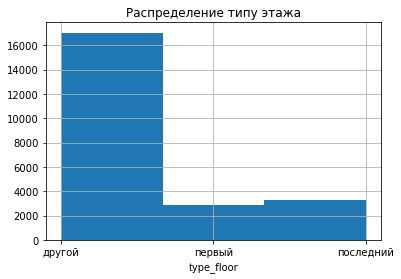

In [172]:
data['type_floor'].hist(bins = 3)
plt.title("Распределение типу этажа")
plt.xlabel("type_floor")

**Вывод:** Логично что последние и первые этажи встречаются реже чем тип " другой "

##### общее количество этажей в доме;

Text(0.5, 0, 'Floors_total')

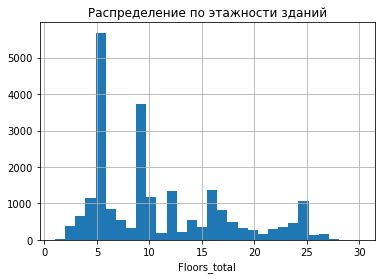

In [173]:
data['floors_total'].hist(bins = 30, range = (1, 30))
plt.title("Распределение по этажности зданий")
plt.xlabel("Floors_total")


**Вывод:** Похоже, что вообщем то наиболее распространены пятиэтажные "хрущевки", и девятиэтажные "панельки" - этим обуславливаются пики на графике. а так же 12,16 и 24 этажа

##### Расстояние до центра города в метрах;

Text(0.5, 0, 'cityCenters_nearest')

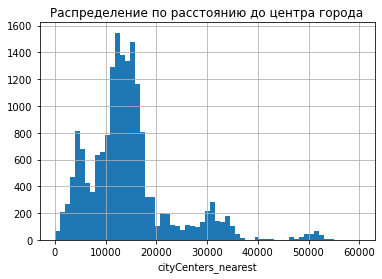

In [174]:
data['cityCenters_nearest'].hist(bins = 61, range = (0, 60000))
plt.title("Распределение по расстоянию до центра города")
plt.xlabel("cityCenters_nearest")

<AxesSubplot:>

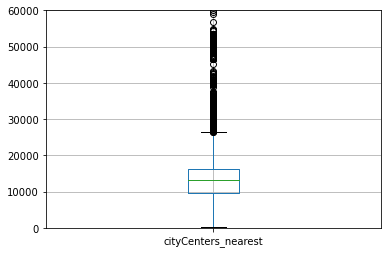

In [175]:
plt.ylim(0, 60000)
data.boxplot(column=['cityCenters_nearest'])

In [176]:
pd.DataFrame([quantile('cityCenters_nearest')])

,columns,norm_min,q1,median,q3,norm_max
0,cityCenters_nearest,208.0,9602.5,13222.0,16383.0,26553.75


**Вывод:**  Медианное значение cityCenters_nearest -  13 км, нижний и верхний квартили - 9 и 16 соответственно 
значения cityCenters_nearest больше  примерно 26,8 км уже можно считать "редкими"

##### Расстояние до ближайшего аэропорта;

Text(0.5, 0, 'airports_nearest')

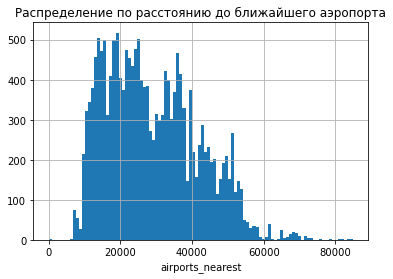

In [177]:
data['airports_nearest'].hist(bins = 100)
plt.title("Распределение по расстоянию до ближайшего аэропорта")
plt.xlabel("airports_nearest")

Распределение не похоже на "нормальное", потому как какие то крупные районы/поселки имеют примерно одинаковое расстояние до аэропорта. можно предпологать, что эти пики относятся к какой то определенной  из локации


##### Расстояние до ближайшего парка;

Text(0.5, 0, 'parks_nearest')

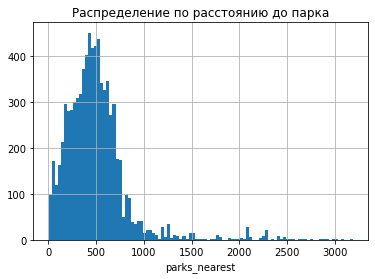

In [178]:
data['parks_nearest'].hist(bins = 100)
plt.title("Распределение по расстоянию до парка")
plt.xlabel("parks_nearest")

**Вывод:** Похоже что если до парка больше 3,5 км, люди не заполняли данные в столбце parks_nearest
больше всего значений когда парк к домк на расстоянии 500м

##### День и месяц публикации объявления.

Text(0.5, 0, 'weekday')

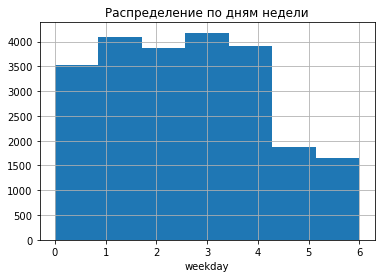

In [179]:
data['weekday'].hist(bins = 7)
plt.title("Распределение по дням недели")
plt.xlabel("weekday")

в суботу и в всокресенье люди не совсем любят заниматься подачей объявлений о продаже недвижимости.
чаще во  вторник и четверг 

Text(0.5, 0, 'month')

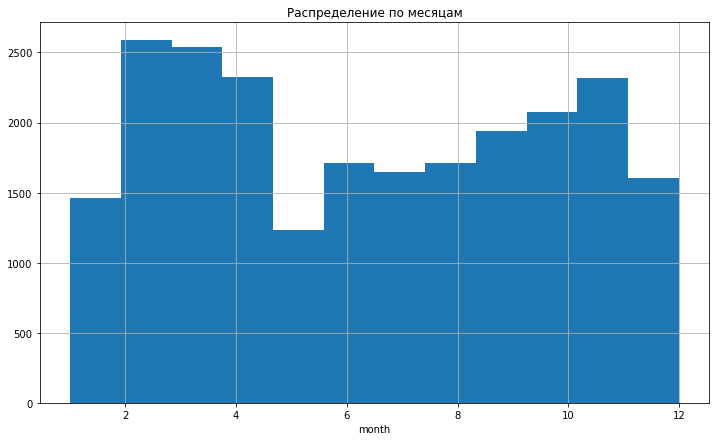

In [180]:
data['month'].hist(bins = 12, figsize = (12,7))
plt.title("Распределение по месяцам")
plt.xlabel("month")

**Вывод:** Лидируют по активности - Март и Февраль
уступают остальным месяцам - Октябрь, Июнь и январь

#### Изучим, как быстро продавались квартиры (столбец days_exposition). 




##### Построим гистограмму.

Text(0.5, 0, 'days_exposition')

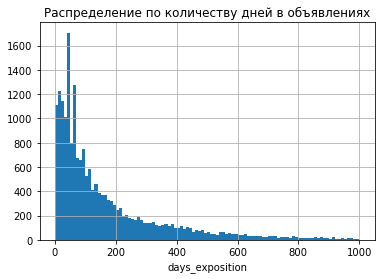

In [181]:
data['days_exposition'].hist(bins = 100, range = (0, 1000))
plt.title("Распределение по количеству дней в объявлениях")
plt.xlabel("days_exposition")

Похоже на распределение пуасона

<AxesSubplot:>

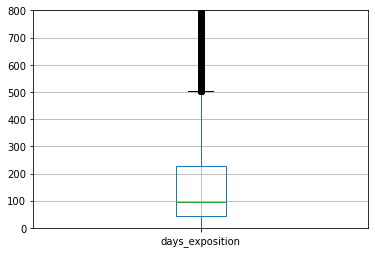

In [182]:
plt.ylim(0, 800)
data.boxplot(column=['days_exposition'])

##### Посчитаем среднее и медиану.

In [183]:
pd.DataFrame([quantile('days_exposition')])

,columns,norm_min,q1,median,q3,norm_max
0,days_exposition,1.0,45.0,94.0,228.0,502.5


In [184]:
data['days_exposition'].mean()

178.99536829523382

**Вывод:** Обычно продажа занимает 94 дней (медианное значение). Необычно долгими можно считать продажи дольще 505 дней. быстрыми продажами можно считать 45 дней (возмем значение - 25% квартиль, т.к. нижний "ус" находится в минимуме по расчетам)

In [185]:
#построим общую таблицу со значениями для выводов
pd.DataFrame([quantile('total_area'),quantile('living_area'),quantile('kitchen_area') \
              ,quantile('last_price'),quantile('rooms') ,quantile('ceiling_height'),\
              quantile('floor'),quantile('floors_total'),quantile('days_exposition') ])

,columns,norm_min,q1,median,q3,norm_max
0,total_area,12.00,40.000,51.30,68.00,110.0000
1,living_area,2.00,18.285,30.00,42.00,77.5725
2,kitchen_area,0.95,7.100,9.00,11.20,17.3500
3,last_price,12.19,3400.000,4600.00,6600.00,11400.0000
4,rooms,0.00,1.000,2.00,3.00,6.0000
5,ceiling_height,2.30,2.550,2.65,2.75,3.0500
6,floor,1.00,2.000,4.00,8.00,17.0000
7,floors_total,1.00,5.000,9.00,16.00,32.5000
8,days_exposition,1.00,45.000,94.00,228.00,502.5000


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим влияние:

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год)

Построим графики, которые покажут зависимость цены от указанных выше параметров. 

Перед расчетом зависимостей, удалим аномальные значения стоимости 

<AxesSubplot:>

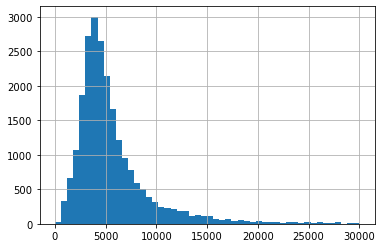

In [186]:
#возьмем ограничение в  30 млн
data['last_price'].hist( bins = 50, range = (0, 30000))


<AxesSubplot:>

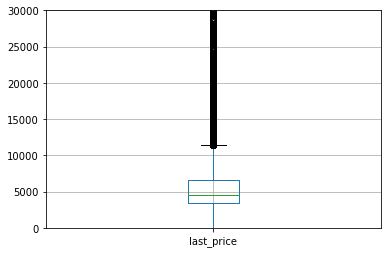

In [187]:

plt.ylim(0, 30000)
data.boxplot(column=['last_price'])

In [188]:
#расчитаем квартили и размах
q1_price = data['last_price'].quantile(0.25)                 
q3_price = data['last_price'].quantile(0.75)
iqr_price = q3_price - q1_price
board_norm_price = q3_price + 1.5*iqr_price
board_norm_price

11400.0

##### Зависит ли цена от: общей площади; жилой площади; площади кухни

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

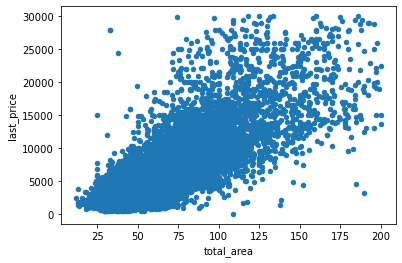

In [189]:
#total_area
data.plot(x='total_area', y='last_price', kind='scatter') 


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

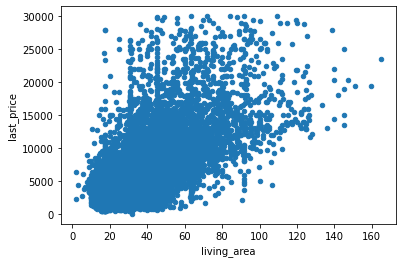

In [190]:
#living_area
data.plot(x='living_area', y='last_price', kind='scatter') 


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

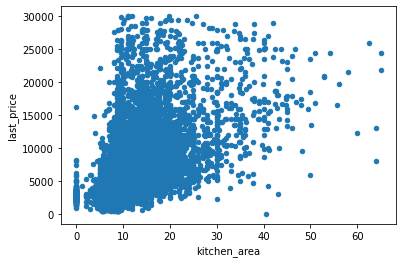

In [191]:
#kitchen_area
data.plot(x='kitchen_area', y='last_price', kind='scatter') 


все таки графики с ограничением по стоимости в  30 000000 более информативные

In [192]:
data[['last_price', 'total_area', 'rooms', 'living_area','kitchen_area']].corr()

,last_price,total_area,rooms,living_area,kitchen_area
last_price,1.000000,0.785180,0.495137,0.647819,0.571989
total_area,0.785180,1.000000,0.793293,0.909105,0.541870
rooms,0.495137,0.793293,1.000000,0.883194,0.215910
living_area,0.647819,0.909105,0.883194,1.000000,0.312453
kitchen_area,0.571989,0.541870,0.215910,0.312453,1.000000


**Вывод** Видим что наибольшая зависимость у last_price  от total_area 

корреляция total_area и last_price 0.78

корреляция living_area и last_price 0.64

корреляция kitchen_area и last_price 0.57

##### Зависит ли цена от: количества комнат; 

<AxesSubplot:xlabel='rooms'>

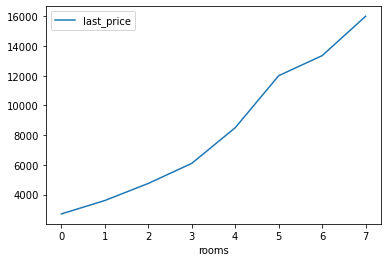

In [193]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot()


общая тенденция равно такая, что зависимость между ценой и количеством комнат - прямая

In [194]:
data[['last_price', 'total_area', 'rooms', 'living_area','kitchen_area']].corr()

,last_price,total_area,rooms,living_area,kitchen_area
last_price,1.000000,0.785180,0.495137,0.647819,0.571989
total_area,0.785180,1.000000,0.793293,0.909105,0.541870
rooms,0.495137,0.793293,1.000000,0.883194,0.215910
living_area,0.647819,0.909105,0.883194,1.000000,0.312453
kitchen_area,0.571989,0.541870,0.215910,0.312453,1.000000


**Вывод** зависимость есть, чем больше комнат, тем выше цена, но на значениях больше 8 есть некоторые аномалии которые связаны с малым количеством измерений 

##### Зависит ли цена от: этажа, на котором расположена квартира (первый, последний, другой)

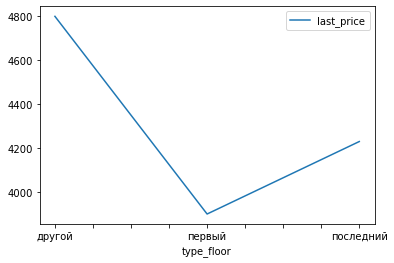

In [195]:
data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median').plot()

plt.show()

**Вывод** Самые "дешевые" квартиры на первом этаже, дальше идут последние этажи, и потом уже другие

##### Зависит ли цена от: даты размещения

<AxesSubplot:xlabel='first_day_exposition'>

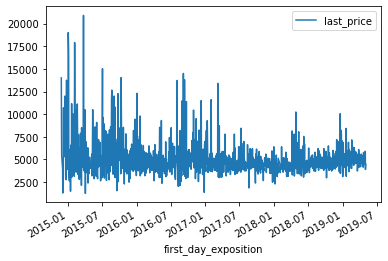

In [196]:
data.pivot_table(index = 'first_day_exposition', values = 'last_price', aggfunc = 'median').plot()


Невозможно делать выводы по такому графику, посмотрим отдельно по каждому параметру (день недели, месяц, год)

##### Зависит ли цена от:  дня недели размещения 

<AxesSubplot:xlabel='weekday'>

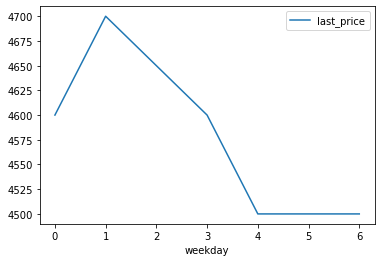

In [197]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').plot()


**Вывод** Разница незначительная, я бы предпочла считать что нет зависимости

##### Зависит ли цена от:  месяца размещения 

<AxesSubplot:xlabel='month'>

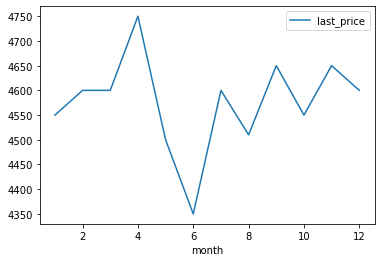

In [198]:
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').sort_values(by = 'month').plot()



**Вывод** Разница незначительная, я бы предпочла считать что нет зависимости

##### Зависит ли цена от:  года размещения 

<AxesSubplot:xlabel='year'>

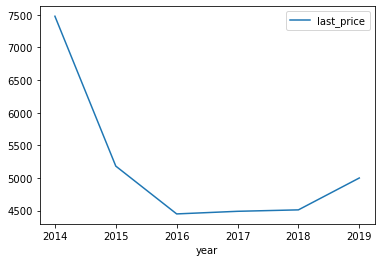

In [199]:
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot()


**Вывод:** Видим что цена квартир падала до 2017 года, а далее опять пошла на повышение. 
совпадает с кризисом произошедшим в 2014 году , то есть как раз далее цены начали падать. а с 2018 рынок начал стабилизироваться. интересно провести такое же исследование с 2014 по 2023 год :) 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [200]:
# создадим новый список с топ 10 с помощью сводной таблицы и сортировки и фильтрации первых 10 
data_top_10 = data.pivot_table(index = 'locality_name', values = 'price_square_m', aggfunc = ['count', 'mean']).reset_index().sort_values(by = ('count', 'price_square_m' ), ascending = False).head(10)
data_top_10

,locality_name,count,mean
,,price_square_m,price_square_m
302,санкт-петербург,15254,110605.691419
207,поселок мурино,552,85629.568678
291,поселок шушары,439,78551.344545
3,всеволожск,397,68719.320400
296,пушкин,364,103122.538840
118,колпино,337,75333.295801
218,поселок парголово,326,90332.263023
6,гатчина,307,68746.146763
43,деревня кудрово,299,92473.547576


In [201]:
#поменяем названия колонок
data_top_10.columns = ('locality_name', 'count', 'price_square_m_mean')

In [202]:
#отсортируем по стоимости кв м
data_top_10 = data_top_10.sort_values(by = 'price_square_m_mean' )

In [203]:
#выведем 
data_top_10

,locality_name,count,price_square_m_mean
4,выборг,235,58238.143141
3,всеволожск,397,68719.320400
6,гатчина,307,68746.146763
118,колпино,337,75333.295801
291,поселок шушары,439,78551.344545
207,поселок мурино,552,85629.568678
218,поселок парголово,326,90332.263023
43,деревня кудрово,299,92473.547576
296,пушкин,364,103122.538840
302,санкт-петербург,15254,110605.691419


''

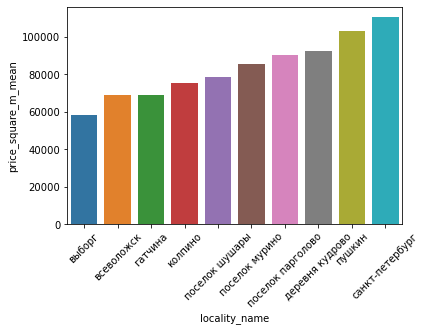

In [204]:
#построим график
sb.barplot(data=data_top_10, x='locality_name', y='price_square_m_mean')
plt.xticks(rotation = 45)
;

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👏🏻👏🏻👏🏻 Отличная визуализация!
</div>

In [205]:
#посчитаем максимум и минимум
max_price = data_top_10['price_square_m_mean'].max()
min_price = data_top_10['price_square_m_mean'].min()

In [206]:
#выведем список с максимальной и минимальной стоимостью
data_top_10.query('price_square_m_mean == @max_price | price_square_m_mean == @min_price')

,locality_name,count,price_square_m_mean
4,выборг,235,58238.143141
302,санкт-петербург,15254,110605.691419


**Вывод:**

Самая высокая  стоимость среди топ10 по количеству объявлений - в Санкт-Петербурге

Самая низкая стоимость среди топ10 по количеству объявлений - в Выборге

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 

In [207]:
#data_St_Pet = data.query('locality_name == "санкт-петербург"')
#data_St_Pet = data_St_Pet.dropna(subset = ['cityCenters_nearest'])

In [208]:
data_St_Pet = data.query('locality_name == "санкт-петербург"').dropna(subset = ['cityCenters_nearest_km'])

In [209]:
data_St_Pet['price_per_km'] = (data_St_Pet['last_price'] // data_St_Pet['cityCenters_nearest_km'] )/ 1000

<AxesSubplot:xlabel='cityCenters_nearest_km'>

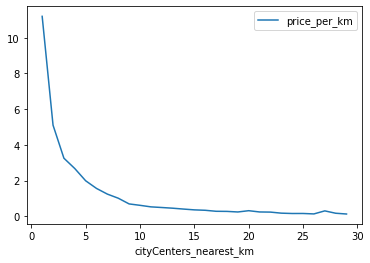

In [210]:
data_St_Pet.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_km', aggfunc = 'mean').plot()

**Вывод:** 

Очень большая разница за квадратный метр в квартирах ближе к центру, а дальше 10 км, уже не такая большая зависимость.

### Общий вывод


**Ознакомление с данными** 

В нашем распоряжении данные сервиса яндекс недвижимость, архив объявлений на несколько лет о продаже квартир в Санкт Петербурге и соседних населенных пунктах

Была поставленам задача выполнить предобработку  данных и изучить их чтобы найти интересные особености и зависимости.

При открытии файла была обнаружена таблица с 22 колонами и 23699 строками. 

**Предобработка данных**

При анализе таблицы обнаружились пропуски
, и аномалии, а так же устранены неявные дубликаты в некоторых столбцах

Приведем график по процентам пропусков по столбцам

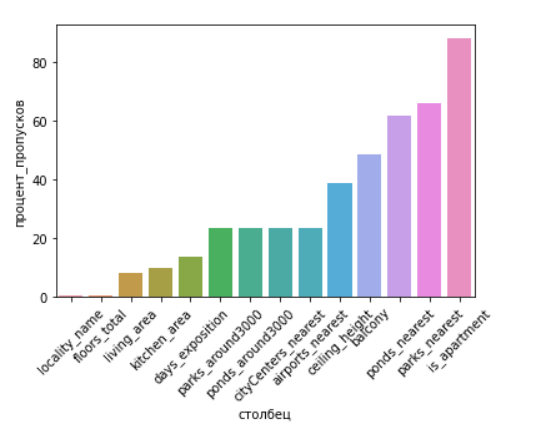

***Далее были обработаны столбцы по очередности (пропуски/аномалии/дубли)***

 - balcony - пустые значения в поле balcony (количество балконов) - заменили на 0, считая что в объектах  недвижимости  без балконов это значение попросту не заполняли
 - locality_name  - устранили дубликаты (пример поселки/посёлки/поселки городского типа и пр.), часть значений заполнили по равноудаленности от аэропорта и центра города, оставшиеся пропуски удалили (в связи с их малым количеством) 
 - floors_total - не обнаружилось взаимосвязи по которой можно было бы восстановить значение, в связи с малым количеством пропусков (0.3%) они были удалены
 - Ceiling_height - обнаружены аномальные значения, часть из которых удалось привести к нормальным, а часть в связи с малым количеством  - удалисть. пропуски были заполнены медианным значением Ceiling_height  в зависимости от этажности здания
 - is_apartment - самое большое количество пропусков. тут заменили пропуски на 0, считая что объекты недвижимости которыые не являются аппартаментами просто игнорировали этот пункт
 - living_area/kitchen_area были заполнены исходя из количества комнат медианным значением
 - days_exposition - считается что пустые значения в объектах недвижимости не снятых с публикации ( не проданных), пропуски не заполнялись
 - остальные пропуски оставили незаполненными (близость парков, прудов. расстояние до парков, прудов, центра города, аэропорта)   - так как не имеется возможным восстановить значения, а удалять их нецелесообразно, потому что таких строк значительно много в датафрейме
 - преобразовали типы в целочисленные там, где это необходимо
 - преобразовали first_day_exposition тип в формат времени 
 - Удалены записи с аномальными значениями площадей, количества комнат и стоимости (удалили примерно  1,2% записей)


**Для дальнейшего анализа были добавлены столбцы с необходимыми расчетами**

- price_square_m - цена одного кв м
- weekday - день недели подачи обхявления
- month- месяц подачи объявления 
- year - год подачи объявления
- type_floor тип этажа "первый", "последний", "другой"
- cityCenters_nearest_km расстояние до центра города в км

**Проведен исследовательский анализ данных**

Изучены столбцы, построены гистограммы и графики размахов

По графикам и расчетам можно  сделать вывод , что наиболее часто встречаются объявления с "типичной" застройки
то есть распределения по этажности зданий имеют несколько отчетливых пиков на 5,9,12 этажах (так называемые "хрущевки", "панельки")

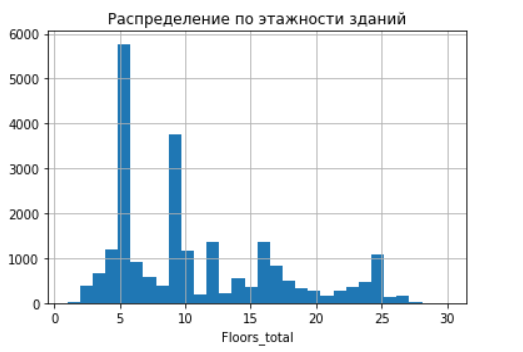

Так же как и значения площадей имеют пики в районе типичных планировок квартир

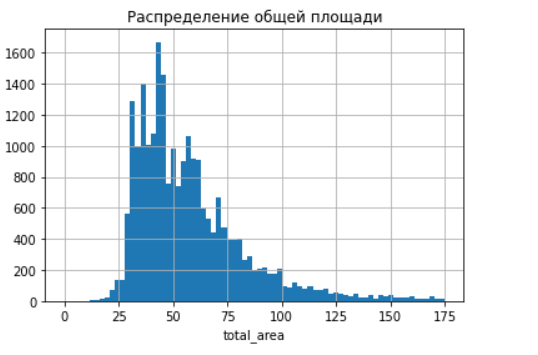

Посчитаны медианные, q1 и q3, границы "усов" (нормальныне значения за которыми идут выбросы - norm_min и norm_max для минимальных и максимальных значений после которых значения считаются выбросами)
Полученные значения можно посмотреть в таблице ниже

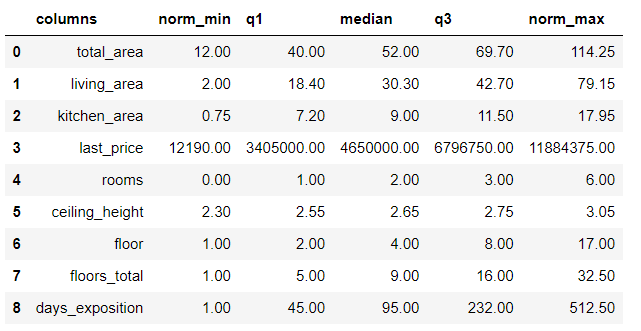

***Как быстро продаются квартиры***
Обычно продажа занимает 94 дня (медианное значение). Необычно долгими можно считать продажи дольще 505 дней. быстрыми продажами можно считать 45 дней



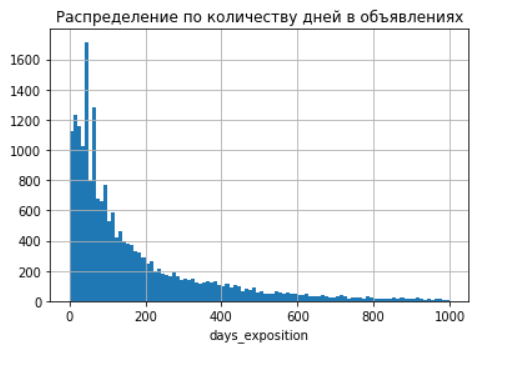



**Изучили факторы влияющие на стоимость:**

- по расчетам корреляции, наиболее значимой все таки является площадь квартиры
связь с жилой площадью и площадью кухни уже меньше
если смотреть на корреляцию количества комнат и стоимости объекта - то тут связь еще слабее
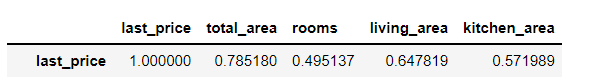



- месяц и день недели публикации не оказывает существенного влияния

- в то время как по годам видим зависимость изменения стоимости от внещних экономических обстоятельств (предположение)

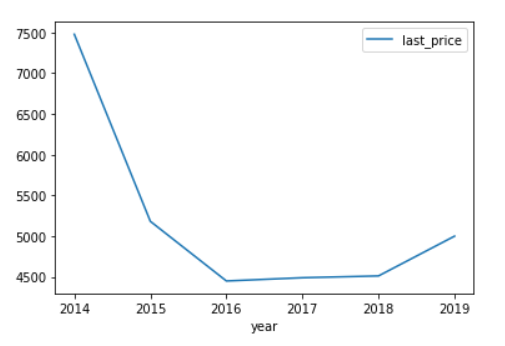

Видим что цена квартир падала до 2017 года, а далее опять пошла на повышение. 
совпадает с кризисом произошедшим в 2014 году , то есть как раз далее цены начали падать. а с 2018 рынок начал стабилизироваться. интересно провести такое же исследование с 2014 по 2023 год :) 

- расчеты зависимости стоимости от типа этажа показали что первые этажи дешевле последних, а последние дешевле остальных

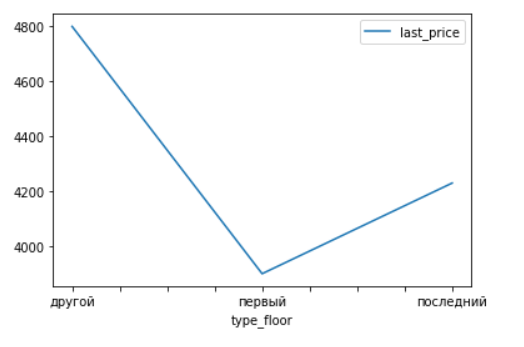


**Посчитана средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

- По расчетам средней цены 1 кв м среди ТОП10 населенных пунктов по количеству объявлений получили такую таблицу (осортирована по стоисости)

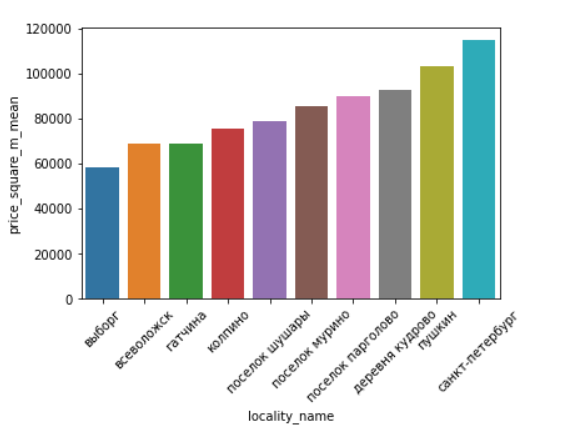

Самый недорогой кв м - в выборге
самый дорогой - в Санкт Петербурге



**Выделены квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислены средние цены каждого километра**

- расчет стоимости от расстояния показал что чем ближе к центру - тем дороже, примерно до 10 км отслеживается сильная зависимость, далее уже зависимость не такая выраженная

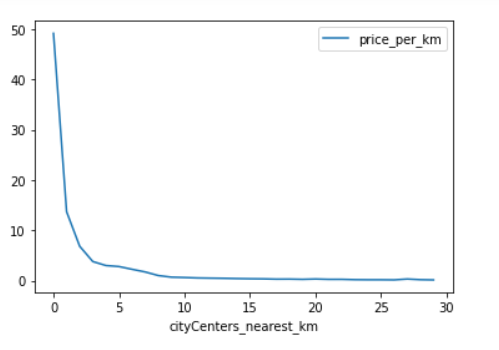



